In [126]:
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import annealing as an

## Traveling salesman problem

Algorytym jaki używam, zaimplementowałem sam w module `annealing.py`. Znajduje się tam też funkcja do rysowania przebiegu wyżarzania i funckja decyzji (czy akceptujemy stan o wyższym koszcie), której używam we wszystkich zadaniach.

Algorytm stosunkowo dobrze radzi sobie z problemem komiwojażera, choć czasem (jak w przypadku 9 grup punktów) nie udaje mu się uzyskać rozwiązania nawet bliskiego optymalnego. 

Consecutive swap vs Arbitrary swap - z przetestowanych przeze mnie przypadków, znacznie lepiej radzi sobie arbitrary swap. Consecutive swap ma duży problem z generowaniem stanów sąsiednich na tyle różnych od poprzedniego, by zmiana wpłynęła istotnie na spadek funkcji kosztu.


### Functions

In [127]:
# total path length (l2)
def walk_cost(order):
    dists = np.linalg.norm(A[order] - np.roll(A[order], shift=1, axis=0), axis=1)
    return dists[1:].sum()

In [128]:
# swap order of two random points
def arbitrary_swap(order, T):
    new_order = np.copy(order)
    a, b = np.random.choice(len(new_order), size=2)
    new_order[[a,b]] = new_order[[b,a]]
    return new_order

In [129]:
# swap order of randomly chosen two consecutive points
def consecutive_swap(order, T):
    new_order = np.copy(order)
    a = np.random.choice(len(new_order))
    b = (a+1)%len(new_order)
    new_order[[a,b]] = new_order[[b,a]]
    return new_order

<AxesSubplot:xlabel='Temperature', ylabel='Acceptance rate (est)'>

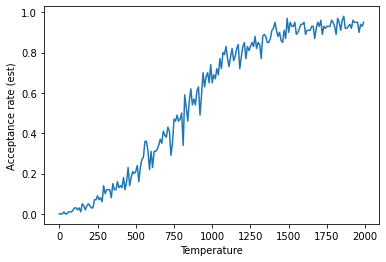

In [130]:
# plotting the accept function from annealing module
X = [x for x in range(0, 2000, 10)]
Y = [sum([an.sigmoid_decision(x) for _ in range(100)])/100 for x in X]
fig = sns.lineplot(x=X, y=Y)
fig.set( xlabel = "Temperature", ylabel = "Acceptance rate (est)")
fig

In [131]:
# plots path
def plot_path(A, order_initial, order_optimized=None):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=A[:,0], y=A[:,1],
                    mode='markers',
                    name='Points'))
    fig.add_trace(go.Scatter(x=A[order_initial][:,0], y=A[order_initial][:,1],
                    mode='lines',
                    name='Initial path',
                    visible='legendonly' if order_optimized is not None else None))
    if order_optimized is not None:
        fig.add_trace(go.Scatter(x=A[order_optimized][:,0], y=A[order_optimized][:,1],
                mode='lines',
                name='Optimized path'))

    fig.update_layout(
        width=550,
        height=350,
        margin=dict(l=50, r=10, t=10, b=10)
    )
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    return fig

### Arbitrary swap

#### Uniform

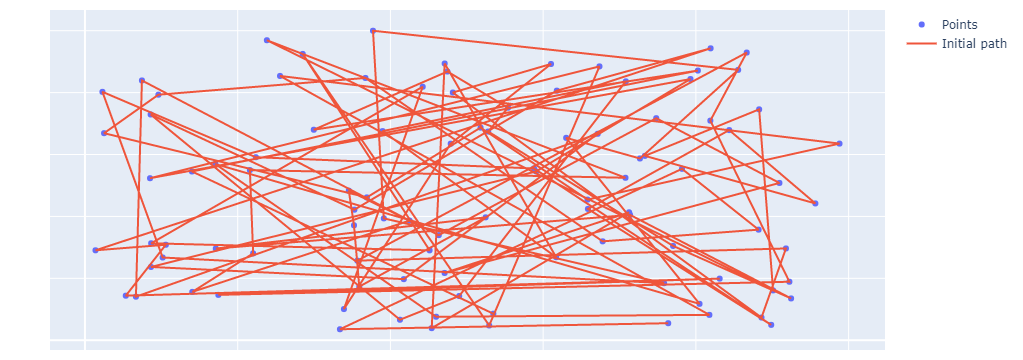

In [132]:
n = 100
A = np.random.uniform(size=(n,2))
order = np.random.permutation(len(A))
plot_path(A, order)

Starting...
0%, iter = 0, cost = 46.66, T = 2000
10%, iter = 1000, cost = 48.13, T = 735.39
20%, iter = 2000, cost = 39.84, T = 270.4
30%, iter = 3000, cost = 26.81, T = 99.42
40%, iter = 4000, cost = 17.43, T = 36.56
50%, iter = 5000, cost = 12.28, T = 13.44
60%, iter = 6000, cost = 11.94, T = 4.94
70%, iter = 7000, cost = 11.94, T = 1.82
80%, iter = 8000, cost = 11.94, T = 0.67
90%, iter = 9000, cost = 11.94, T = 0.25
100%, iter = 10000, cost = 11.94, T = 0.09
Finished!


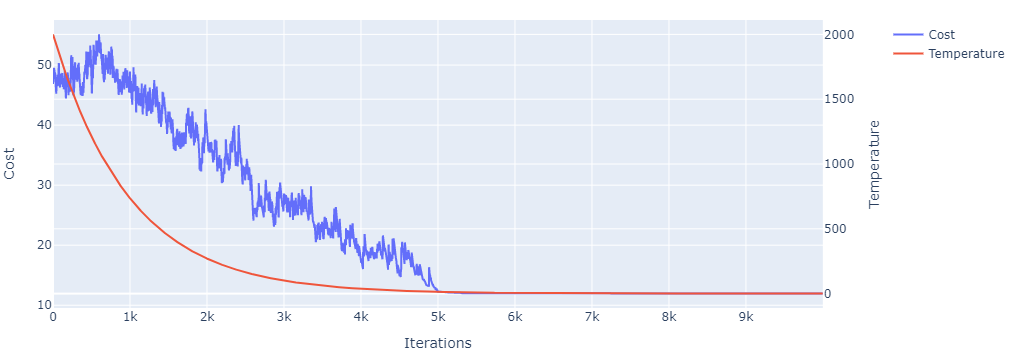

In [133]:
x, cost_hist, T_hist = an.anneal(
    x_0 = order,
    cost_fun = walk_cost,
    update_fun = arbitrary_swap,
    T_change_fun = lambda T: T*0.999,
    iters=10000,
    verbose=True
)
an.plot_annealing(cost_hist, T_hist)

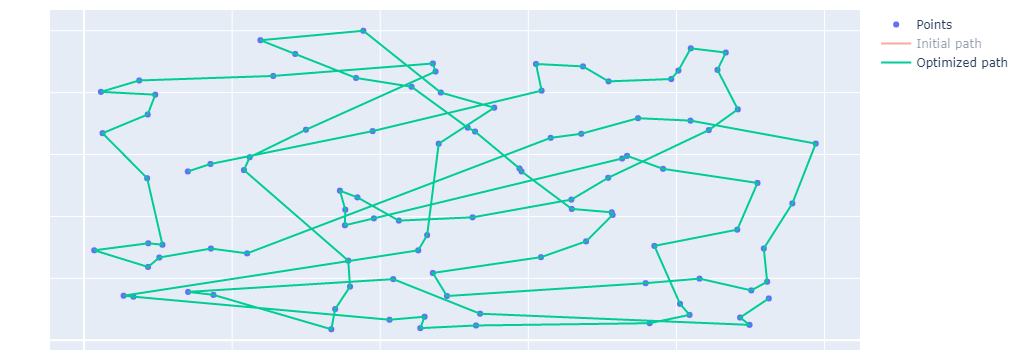

In [134]:
# outcome
plot_path(A, order, x)

#### Gaussian distribution

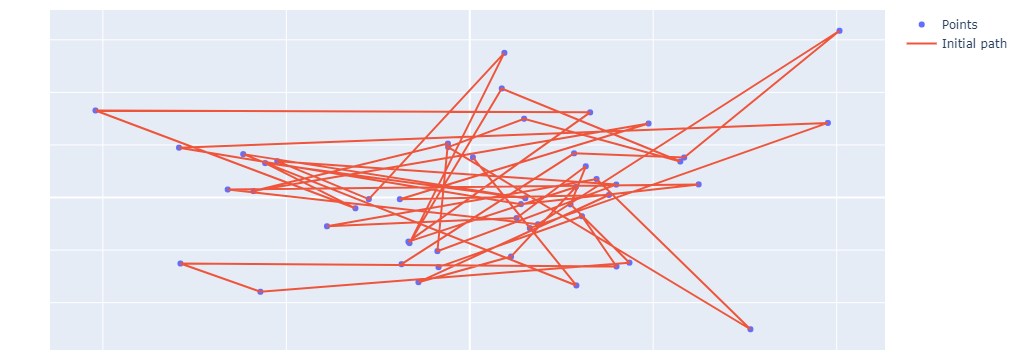

In [135]:
n = 50
A = np.random.normal(scale=(4,1),size=(n,2))
order = np.random.permutation(len(A))
plot_path(A, order)

In [136]:
x, cost_hist, T_hist = an.anneal(
    x_0 = order,
    cost_fun = walk_cost,
    update_fun = arbitrary_swap,
    T_change_fun = lambda T: T*0.999,
    iters=10000,
    verbose=False
)
an.plot_annealing(cost_hist, T_hist)

In [137]:
# outcome
plot_path(A, order, x)

#### 9 group

In [138]:
n = 300
A = np.concatenate([
    [i,j] + np.random.normal(size=(n//9,2))
    for i in (-10,0,10) for j in (-10,0,10)
])
order = np.random.permutation(len(A))
plot_path(A, order)

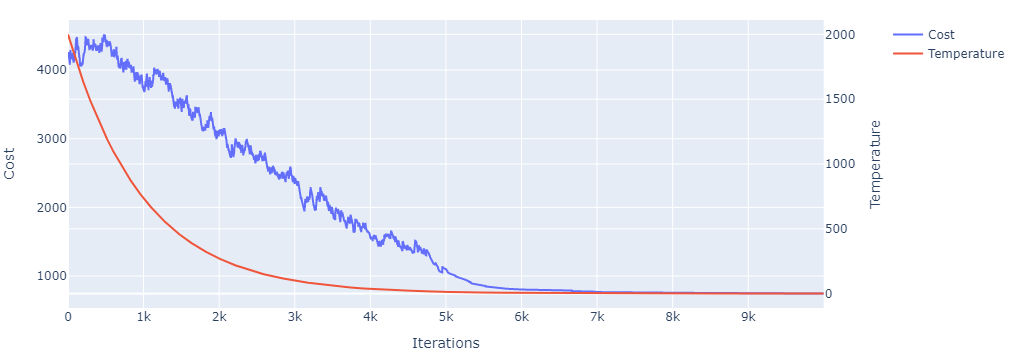

In [139]:
x, cost_hist, T_hist = an.anneal(
    x_0 = order,
    cost_fun = walk_cost,
    update_fun = arbitrary_swap,
    T_change_fun = lambda T: T*0.999,
    iters=10000,
    verbose=False
)
an.plot_annealing(cost_hist, T_hist)

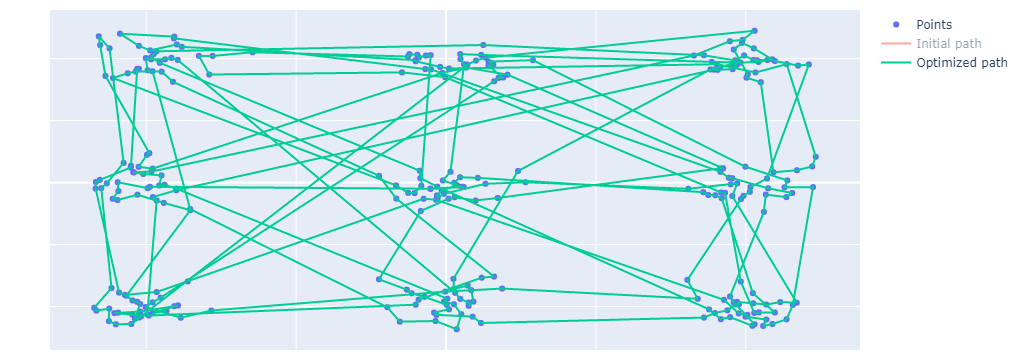

In [140]:
# outcome
plot_path(A, order, x)

### Consecutive swap

#### Uniform

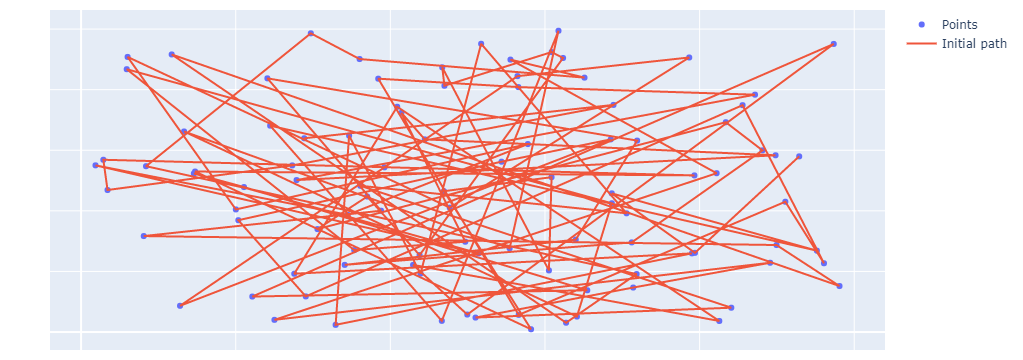

In [141]:
n = 100
A = np.random.uniform(size=(n,2))
order = np.random.permutation(len(A))
plot_path(A, order)

In [142]:
x, cost_hist, T_hist = an.anneal(
    x_0 = order,
    cost_fun = walk_cost,
    update_fun = consecutive_swap,
    T_change_fun = lambda T: T*0.999,
    iters=10000,
    verbose=True
)
an.plot_annealing(cost_hist, T_hist)

Starting...
0%, iter = 0, cost = 46.66, T = 2000
10%, iter = 1000, cost = 45.59, T = 735.39
20%, iter = 2000, cost = 35.35, T = 270.4
30%, iter = 3000, cost = 33.45, T = 99.42
40%, iter = 4000, cost = 31.55, T = 36.56
50%, iter = 5000, cost = 31.21, T = 13.44
60%, iter = 6000, cost = 31.21, T = 4.94
70%, iter = 7000, cost = 31.21, T = 1.82
80%, iter = 8000, cost = 31.21, T = 0.67
90%, iter = 9000, cost = 31.21, T = 0.25
100%, iter = 10000, cost = 31.21, T = 0.09
Finished!


In [143]:
# outcome
plot_path(A, order, x)

#### Gaussian distribution

In [144]:
n = 50
A = np.random.normal(scale=(2,1),size=(n,2))
order = np.random.permutation(len(A))
plot_path(A, order)

In [145]:
x, cost_hist, T_hist = an.anneal(
    x_0 = order,
    cost_fun = walk_cost,
    update_fun = consecutive_swap,
    T_change_fun = lambda T: T*0.999,
    iters=10000,
    verbose=False
)
an.plot_annealing(cost_hist, T_hist)

In [146]:
# outcome
plot_path(A, order, x)

#### 9 group

In [147]:
n = 300
A = np.concatenate([
    [i,j] + np.random.normal(size=(n//9,2))
    for i in (-10,0,10) for j in (-10,0,10)
])
order = np.random.permutation(len(A))
plot_path(A, order)

In [148]:
x, cost_hist, T_hist = an.anneal(
    x_0 = order,
    cost_fun = walk_cost,
    update_fun = consecutive_swap,
    T_change_fun = lambda T: T*0.999,
    iters=10000,
    verbose=False
)
an.plot_annealing(cost_hist, T_hist)

In [149]:
# outcome
plot_path(A, order, x)